In [1]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
r = requests.get("http://192.168.15.131:5000/api/v0.1/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)
    df = pd.read_json(json.dumps(register))
    df.head()

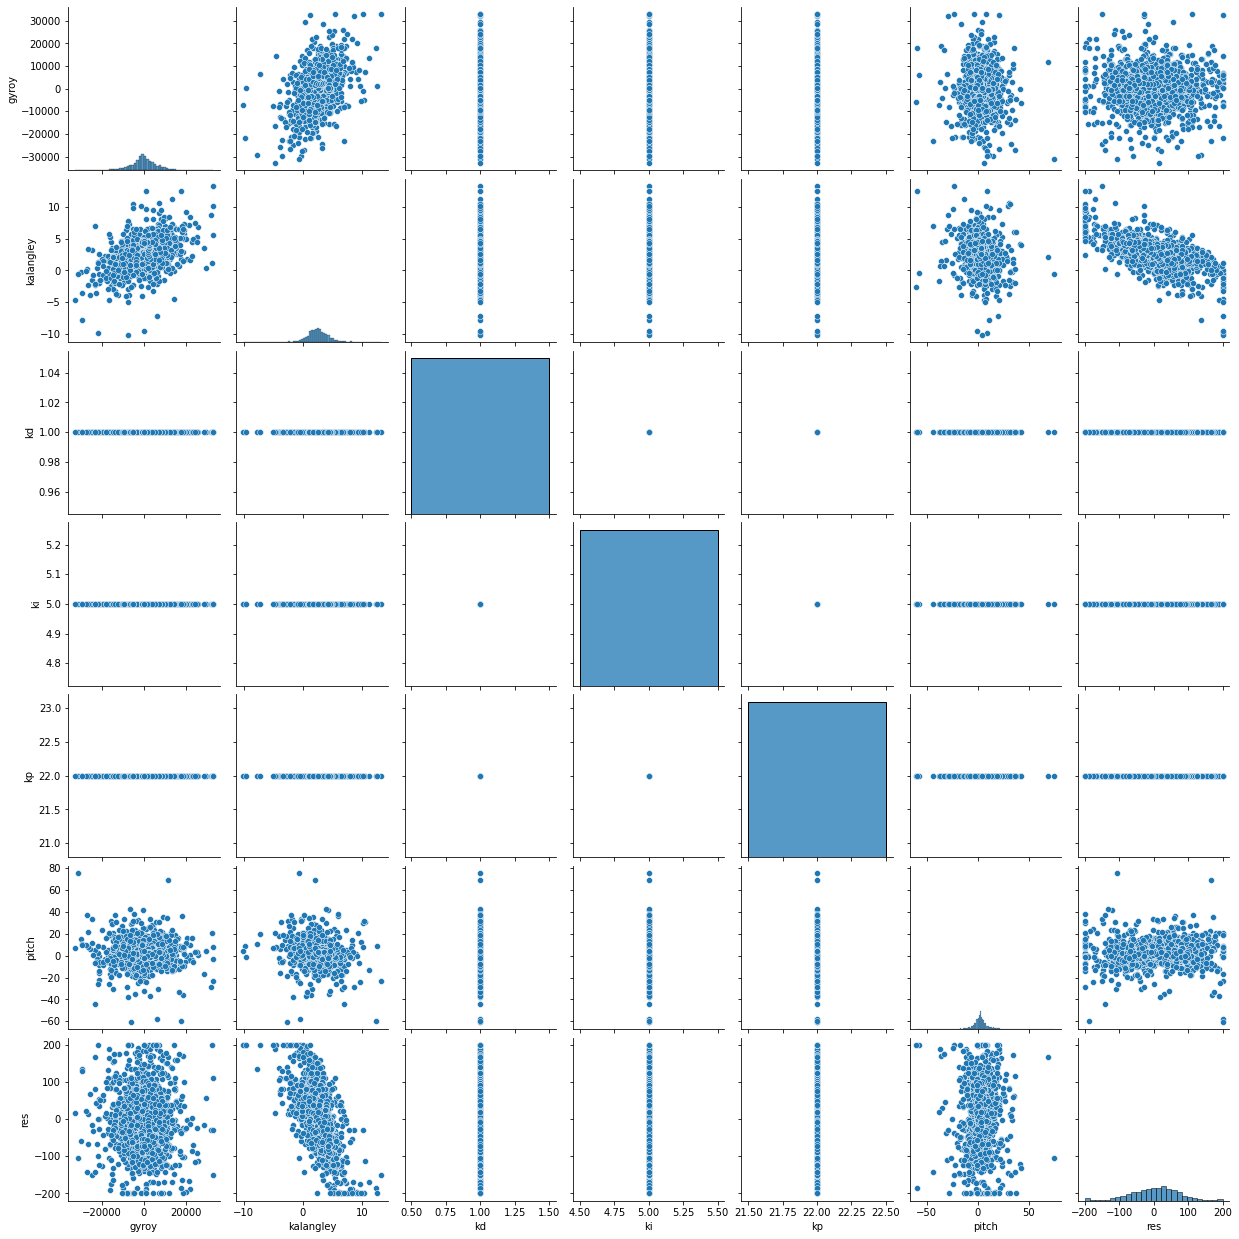

In [3]:
sns.pairplot(data = df)
plt.show()

/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/joao/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='res', ylabel='Density'>

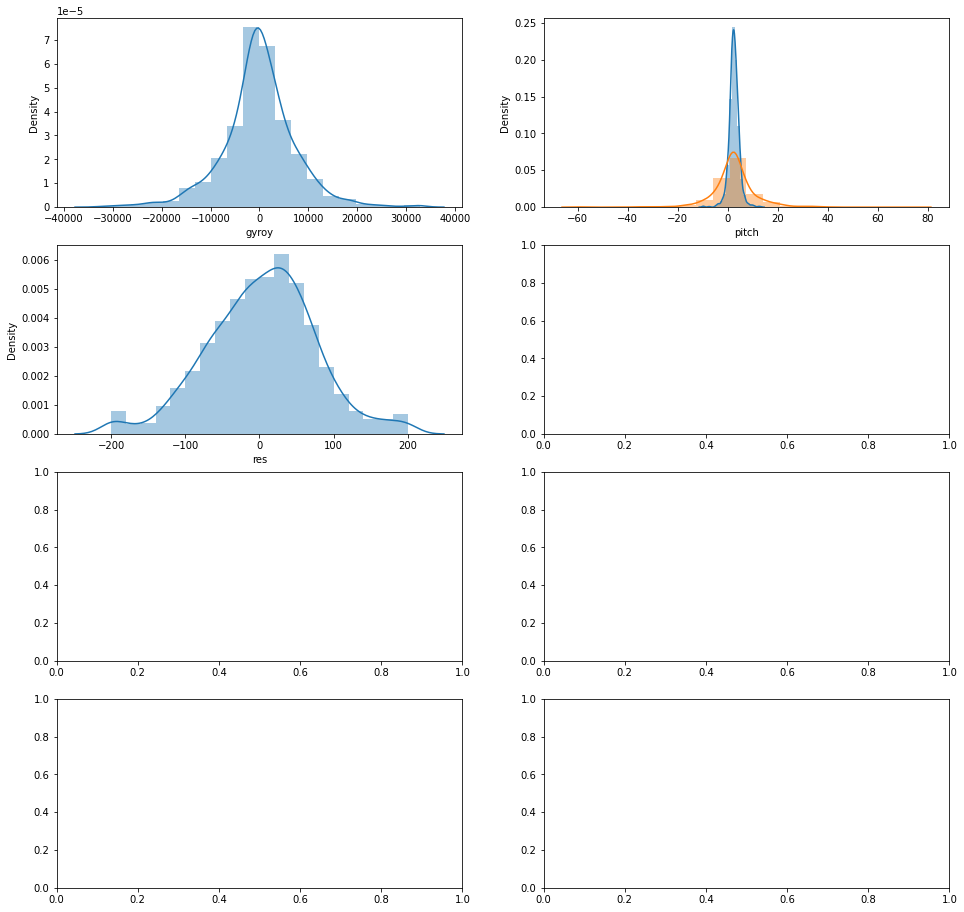

In [4]:
fig, ax = plt.subplots(4, 2, figsize = (16, 16))
sns.distplot(df.gyroy, bins = 20, ax = ax[0,0])
sns.distplot(df.kalangley, bins = 20, ax = ax[0,1])
sns.distplot(df.pitch, bins = 20, ax = ax[0,1])
sns.distplot(df.res, bins = 20, ax = ax[1,0])
# sns.distplot(df.insulina, bins = 20, ax = ax[1,1])
# sns.distplot(df.massa, bins = 20, ax = ax[2,0])
# sns.distplot(df.funcao_pedigree, bins = 20, ax = ax[2,1])
# sns.distplot(df.idade, bins = 20, ax = ax[3,0])
# sns.distplot(df.resultado, bins = 20, ax = ax[3,1])

In [31]:
r = requests.get("http://192.168.15.131:5000/api/v0.1/selfbalancing/influx/all")
if r.status_code == 200:
    #print(r.content)
    register_influx = json.loads(r.content)
    df_influx = pd.read_json(json.dumps(register_influx))

In [6]:
df_influx.head()

,0,1,2,3,4,5,6,7,8,9,...,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893
0,"{'time': '2021-10-02T02:04:26.803571Z', 'value...","{'time': '2021-10-02T02:04:26.823997Z', 'value...","{'time': '2021-10-02T02:04:26.839330Z', 'value...","{'time': '2021-10-02T02:04:26.857044Z', 'value...","{'time': '2021-10-02T02:04:26.874599Z', 'value...","{'time': '2021-10-02T02:04:26.894000Z', 'value...","{'time': '2021-10-02T02:04:26.912432Z', 'value...","{'time': '2021-10-02T02:04:26.929222Z', 'value...","{'time': '2021-10-02T02:04:26.948009Z', 'value...","{'time': '2021-10-02T02:04:26.965484Z', 'value...",...,"{'time': '2021-10-02T02:05:01.059322Z', 'value...","{'time': '2021-10-02T02:05:01.076411Z', 'value...","{'time': '2021-10-02T02:05:01.096065Z', 'value...","{'time': '2021-10-02T02:05:01.112905Z', 'value...","{'time': '2021-10-02T02:05:01.130752Z', 'value...","{'time': '2021-10-02T02:05:01.150023Z', 'value...","{'time': '2021-10-02T02:05:01.166897Z', 'value...","{'time': '2021-10-02T02:05:01.185874Z', 'value...","{'time': '2021-10-02T02:05:01.203583Z', 'value...","{'time': '2021-10-02T02:05:01.221618Z', 'value..."


In [7]:
df_influx.T

,0
0,"{'time': '2021-10-02T02:04:26.803571Z', 'value..."
1,"{'time': '2021-10-02T02:04:26.823997Z', 'value..."
2,"{'time': '2021-10-02T02:04:26.839330Z', 'value..."
3,"{'time': '2021-10-02T02:04:26.857044Z', 'value..."
4,"{'time': '2021-10-02T02:04:26.874599Z', 'value..."
...,...
1889,"{'time': '2021-10-02T02:05:01.150023Z', 'value..."
1890,"{'time': '2021-10-02T02:05:01.166897Z', 'value..."
1891,"{'time': '2021-10-02T02:05:01.185874Z', 'value..."
1892,"{'time': '2021-10-02T02:05:01.203583Z', 'value..."


In [8]:
tempo = []
for x in df_influx.T[0]:
    tempo.append(x["time"])
    #print(x["time"])

In [9]:
tempo

['2021-10-02T02:04:26.803571Z',
 '2021-10-02T02:04:26.823997Z',
 '2021-10-02T02:04:26.839330Z',
 '2021-10-02T02:04:26.857044Z',
 '2021-10-02T02:04:26.874599Z',
 '2021-10-02T02:04:26.894000Z',
 '2021-10-02T02:04:26.912432Z',
 '2021-10-02T02:04:26.929222Z',
 '2021-10-02T02:04:26.948009Z',
 '2021-10-02T02:04:26.965484Z',
 '2021-10-02T02:04:26.983116Z',
 '2021-10-02T02:04:27.001021Z',
 '2021-10-02T02:04:27.018739Z',
 '2021-10-02T02:04:27.038444Z',
 '2021-10-02T02:04:27.055093Z',
 '2021-10-02T02:04:27.071929Z',
 '2021-10-02T02:04:27.090711Z',
 '2021-10-02T02:04:27.108632Z',
 '2021-10-02T02:04:27.127940Z',
 '2021-10-02T02:04:27.144498Z',
 '2021-10-02T02:04:27.164595Z',
 '2021-10-02T02:04:27.181424Z',
 '2021-10-02T02:04:27.199900Z',
 '2021-10-02T02:04:27.219129Z',
 '2021-10-02T02:04:27.236021Z',
 '2021-10-02T02:04:27.254771Z',
 '2021-10-02T02:04:27.272476Z',
 '2021-10-02T02:04:27.290015Z',
 '2021-10-02T02:04:27.308270Z',
 '2021-10-02T02:04:27.327898Z',
 '2021-10-02T02:04:27.343476Z',
 '2021-1

In [10]:
valor = []
for y in df_influx.T[0]:
    valor.append(y["value"])
    #print(y["value"])

In [97]:
teste = json.loads(valor[0])
teste["measure"]

{'accx': 1628.0,
 'accy': -176.0,
 'accz': -17884.0,
 'gyrox': -327.0,
 'gyroy': 137.0,
 'gyroz': -224.0,
 'kalanglex': -0.33,
 'kalangley': 3.51,
 'pitch': 5.2,
 'roll': -0.56,
 'res': -65.72,
 'kp': 22.0,
 'kd': 1.0,
 'ki': 5.0}

In [98]:
teste["measure"]["tempo"] = tempo[0]

In [100]:
teste["measure"]

{'accx': 1628.0,
 'accy': -176.0,
 'accz': -17884.0,
 'gyrox': -327.0,
 'gyroy': 137.0,
 'gyroz': -224.0,
 'kalanglex': -0.33,
 'kalangley': 3.51,
 'pitch': 5.2,
 'roll': -0.56,
 'res': -65.72,
 'kp': 22.0,
 'kd': 1.0,
 'ki': 5.0,
 'tempo': '2021-10-02T02:04:26.803571Z'}

In [107]:
json_serialized_measure = {}
for z in range(len(df_influx.T[0])):
    json_serialized_measure[z] = json.loads(valor[z])
    json_serialized_measure[z]["measure"]["tempo"] = tempo[z]

In [115]:
lista_final = {}
for a in range(len(df_influx.T[0])):
    lista_final[a] = json_serialized_measure[a]["measure"]

In [116]:
lista_final

{0: {'accx': 1628.0,
  'accy': -176.0,
  'accz': -17884.0,
  'gyrox': -327.0,
  'gyroy': 137.0,
  'gyroz': -224.0,
  'kalanglex': -0.33,
  'kalangley': 3.51,
  'pitch': 5.2,
  'roll': -0.56,
  'res': -65.72,
  'kp': 22.0,
  'kd': 1.0,
  'ki': 5.0,
  'tempo': '2021-10-02T02:04:26.803571Z'},
 1: {'accx': -164.0,
  'accy': 380.0,
  'accz': -18952.0,
  'gyrox': -287.0,
  'gyroy': -534.0,
  'gyroz': -917.0,
  'kalanglex': -0.26,
  'kalangley': 3.28,
  'pitch': -0.5,
  'roll': 1.15,
  'res': -64.91,
  'kp': 22.0,
  'kd': 1.0,
  'ki': 5.0,
  'tempo': '2021-10-02T02:04:26.823997Z'},
 2: {'accx': 2016.0,
  'accy': -84.0,
  'accz': -18560.0,
  'gyrox': 389.0,
  'gyroy': -3555.0,
  'gyroz': -5501.0,
  'kalanglex': -0.17,
  'kalangley': 2.96,
  'pitch': 6.2,
  'roll': -0.26,
  'res': -60.28,
  'kp': 22.0,
  'kd': 1.0,
  'ki': 5.0,
  'tempo': '2021-10-02T02:04:26.839330Z'},
 3: {'accx': 544.0,
  'accy': -148.0,
  'accz': -17108.0,
  'gyrox': 531.0,
  'gyroy': -3469.0,
  'gyroz': -6792.0,
  'kalangl

In [117]:
dfitem = pd.DataFrame.from_dict(lista_final)

In [119]:
dfitem.T

,accx,accy,accz,gyrox,gyroy,gyroz,kalanglex,kalangley,pitch,roll,res,kp,kd,ki,tempo
0,1628.0,-176.0,-17884.0,-327.0,137.0,-224.0,-0.33,3.51,5.2,-0.56,-65.72,22.0,1.0,5.0,2021-10-02T02:04:26.803571Z
1,-164.0,380.0,-18952.0,-287.0,-534.0,-917.0,-0.26,3.28,-0.5,1.15,-64.91,22.0,1.0,5.0,2021-10-02T02:04:26.823997Z
2,2016.0,-84.0,-18560.0,389.0,-3555.0,-5501.0,-0.17,2.96,6.2,-0.26,-60.28,22.0,1.0,5.0,2021-10-02T02:04:26.839330Z
3,544.0,-148.0,-17108.0,531.0,-3469.0,-6792.0,-0.07,2.47,1.82,-0.5,-49.52,22.0,1.0,5.0,2021-10-02T02:04:26.857044Z
4,1664.0,-932.0,-17808.0,343.0,-4376.0,-6725.0,-0.11,2.04,5.33,-2.98,-37.7,22.0,1.0,5.0,2021-10-02T02:04:26.874599Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,-128.0,-1976.0,-16608.0,-740.0,5307.0,6708.0,0.63,4.08,-0.44,-6.78,-26.97,22.0,1.0,5.0,2021-10-02T02:05:01.150023Z
1890,332.0,-752.0,-17720.0,-917.0,3814.0,4336.0,0.43,4.47,1.07,-2.43,-45.62,22.0,1.0,5.0,2021-10-02T02:05:01.166897Z
1891,-140.0,-448.0,-17308.0,-306.0,1617.0,7.0,0.37,4.48,-0.46,-1.48,-56.09,22.0,1.0,5.0,2021-10-02T02:05:01.185874Z
1892,1460.0,-1020.0,-18192.0,-292.0,346.0,-1891.0,0.23,4.55,4.58,-3.2,-67.68,22.0,1.0,5.0,2021-10-02T02:05:01.203583Z


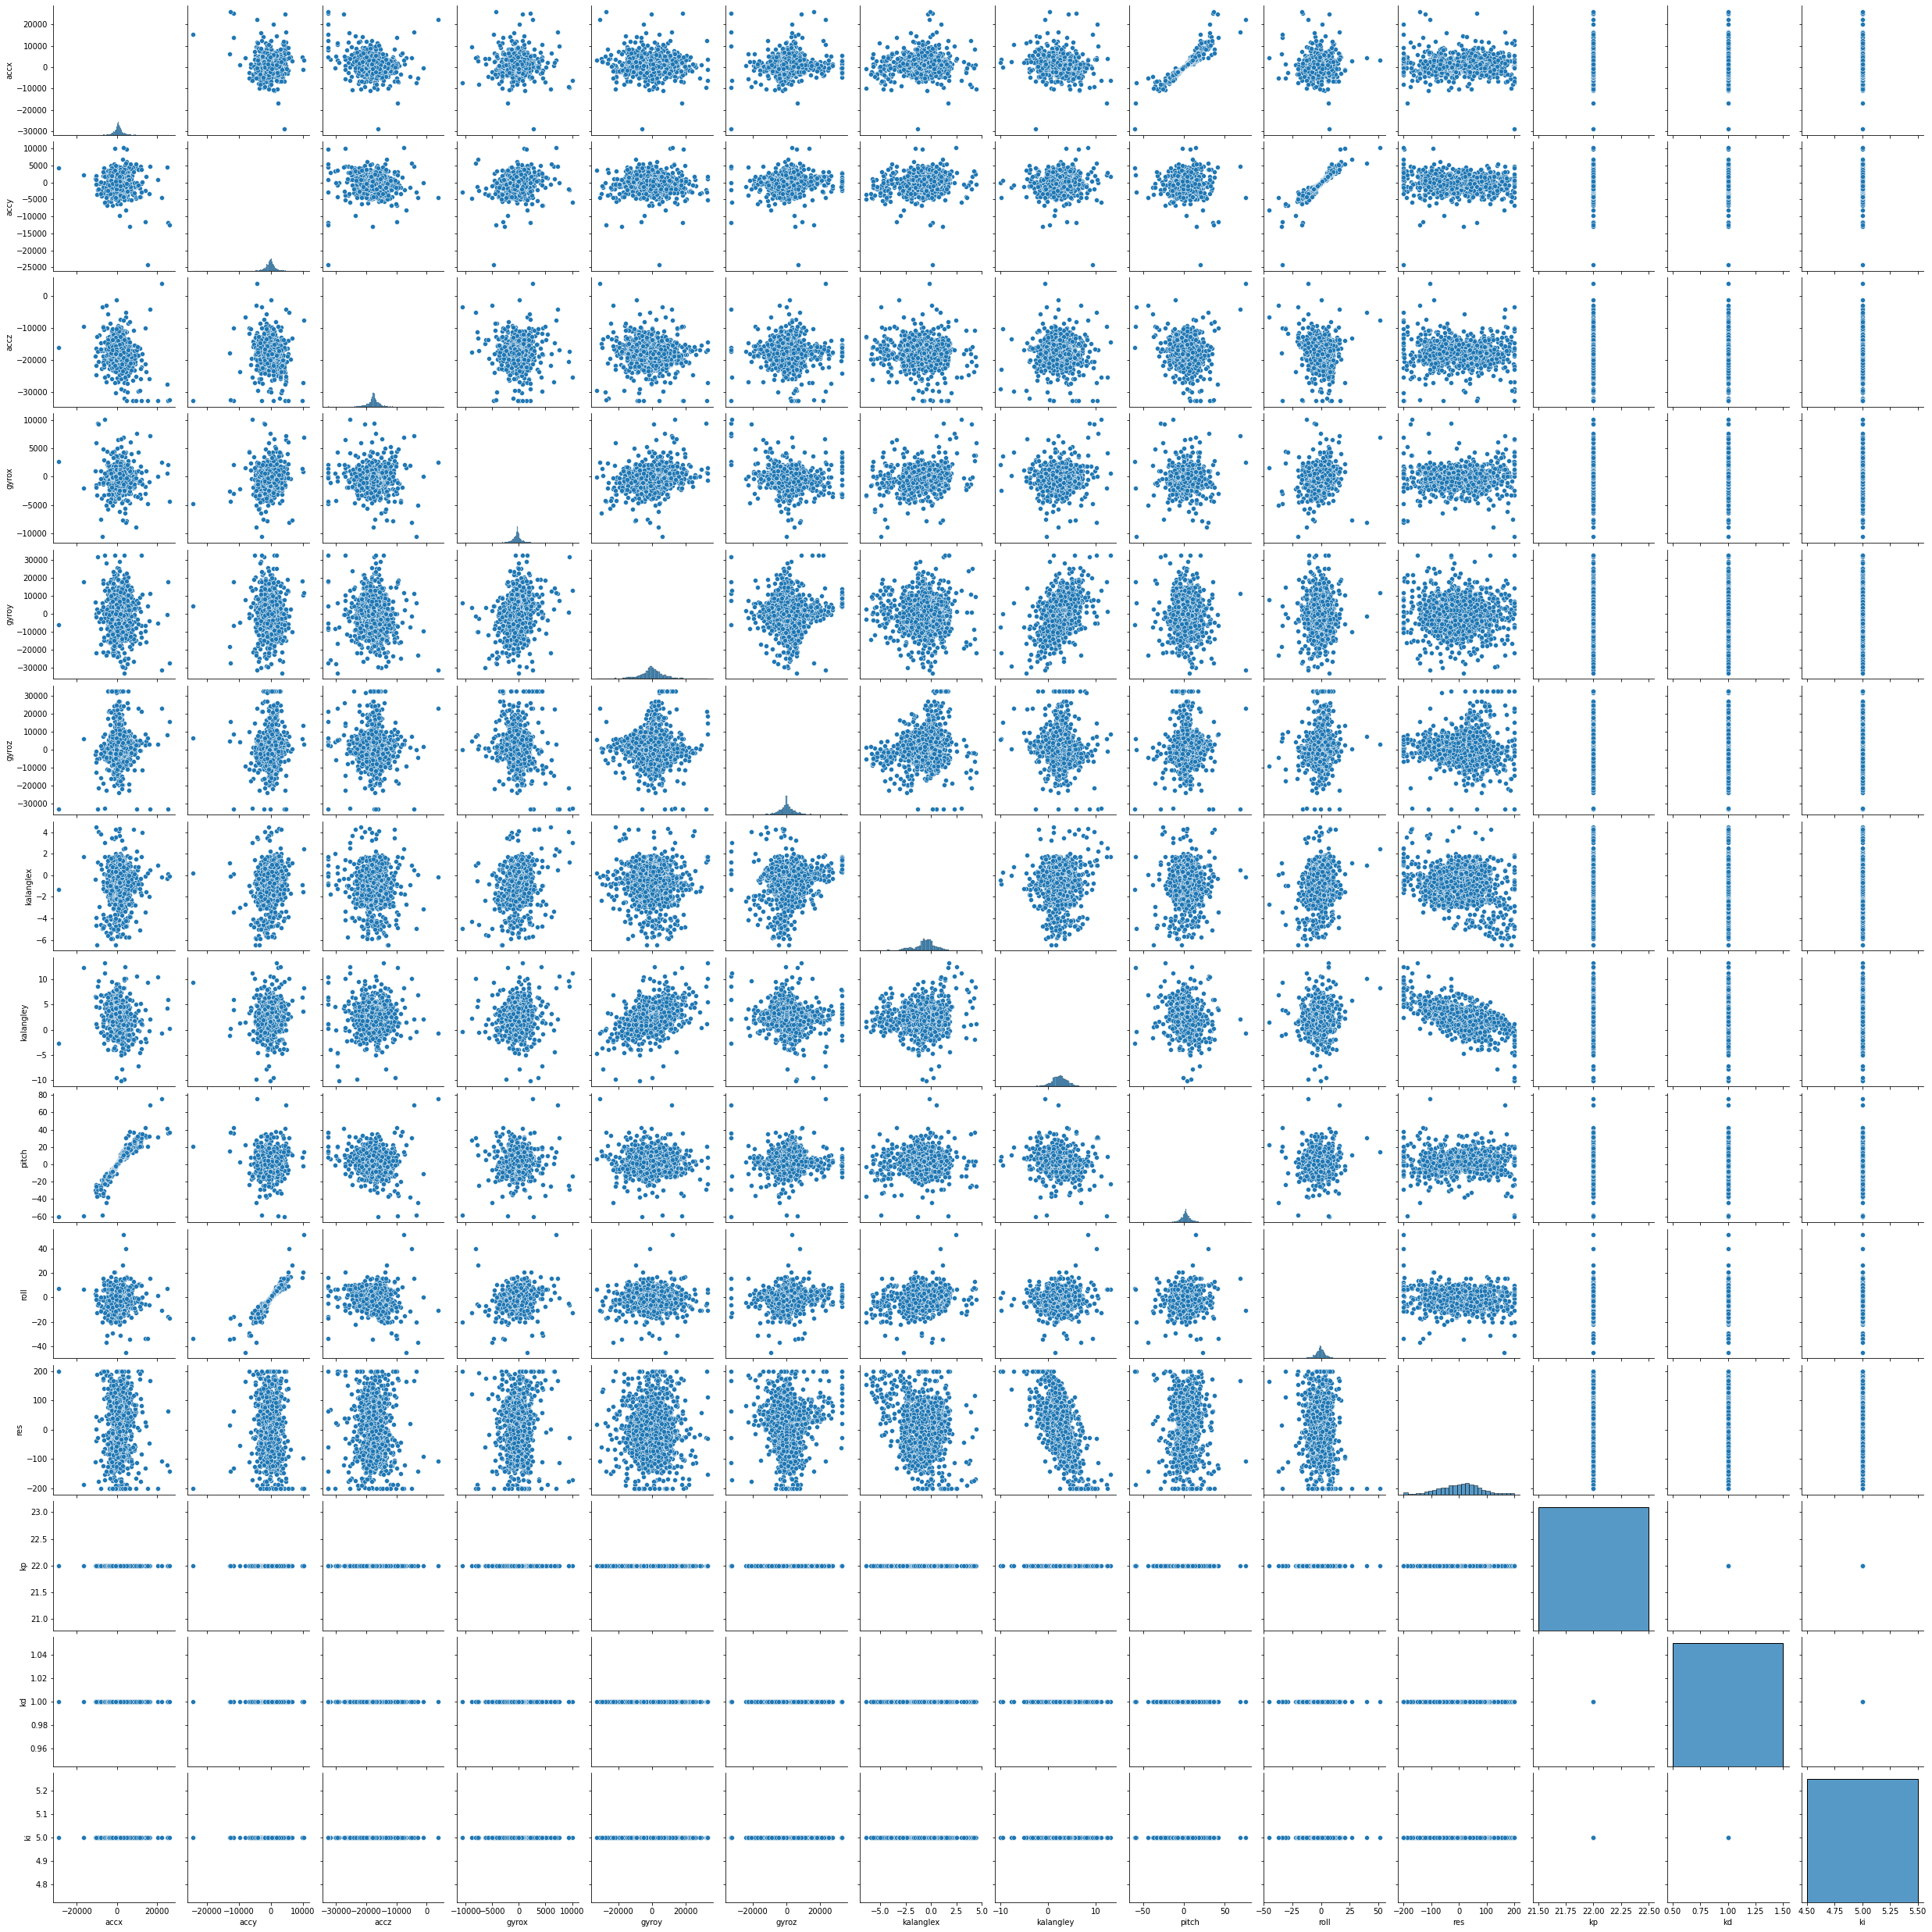

In [120]:
sns.pairplot(data = dfitem.T)
plt.show()